<a href="https://colab.research.google.com/github/snehaaraj27/Machine_learning_models/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression**

*   Y = m*x+c (Simple linear Regression)
*   Y = m1*x1 + m2*x2 + ......+ mn*xn + c (Multiple linear Regression)

In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
company=pd.read_csv("/content/1000_Companies.csv")
X = company.iloc[:,:-1].values  #(except the last row)
Y = company.iloc[:,:4].values

In [132]:
company.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<ipython-input-133-2af42506e4f8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(company.corr()) #the diagonal line is where the data is highly valued and correspondiong data when it becomes darker there is less connections between the data


<Axes: >

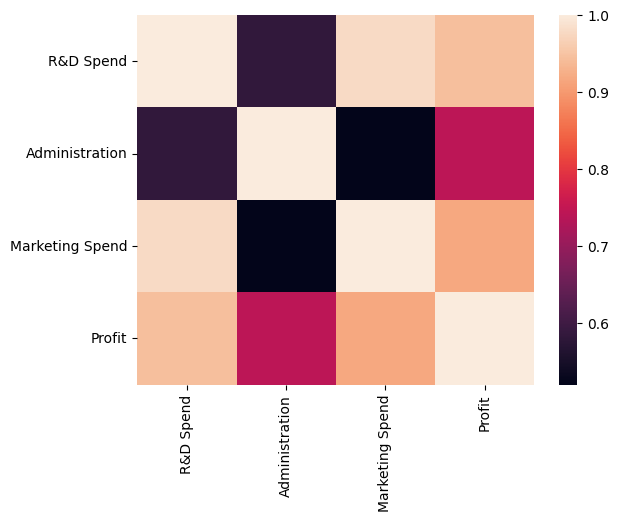

In [133]:
sns.heatmap(company.corr()) #the diagonal line is where the data is highly valued and correspondiong data when it becomes darker there is less connections between the data

In [134]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3]) #looking at all the diffrent rows (:) the 3 defines the 3rd column

onehotencoder = OneHotEncoder(categories='auto', sparse=False) # Specify the column(s) to be one-hot encoded
X = onehotencoder.fit_transform(X) # Apply encoding

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [135]:
X = X[:,1:] #REMOVING OF DUMMY VARIABLE

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [137]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming 'State' is a categorical variable in X_train and you know its index
column_index_of_state = 0  # Replace this with the actual index of the 'State' column in X_train

column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), [column_index_of_state])
    ],
    remainder='passthrough'
)

X_train_encoded = column_transformer.fit_transform(X_train)


In [138]:
from sklearn.preprocessing import OneHotEncoder

# Convert y_train to strings
y_train_str = y_train.astype(str)

# Perform one-hot encoding
onehot_encoder = OneHotEncoder()
y_train_encoded = onehot_encoder.fit_transform(y_train_str.reshape(-1, 1))


In [139]:
# Assuming y_train_encoded has more samples than X_train_encoded
y_train_encoded = y_train_encoded[:X_train_encoded.shape[0], :]



In [140]:
y_train_dense = y_train_encoded.toarray()


In [141]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train_encoded, y_train_dense)

LinearRegression()

In [142]:
# from sklearn.linear_model import LinearRegression
# regression = LinearRegression()
# regression.fit(X_train, y_train)
# I got error in this so the following code I used to

In [143]:
#now start with the prediction
y_pred = regression.predict(X_train_encoded)

In [144]:
print(y_pred)

[[ 2.28549818e-16  0.00000000e+00  0.00000000e+00 ...  3.62210262e-15
   1.92901251e-15  4.57763672e-05]
 [ 2.66713734e-16  0.00000000e+00  0.00000000e+00 ... -8.74300632e-15
  -5.12090370e-15  3.81469727e-05]
 [ 3.25260652e-17  0.00000000e+00  0.00000000e+00 ...  1.38777878e-17
   4.10782519e-15 -1.62506104e-03]
 ...
 [ 1.33140027e-16  0.00000000e+00  0.00000000e+00 ... -3.46944695e-16
  -6.93889390e-16  3.81469727e-05]
 [ 4.98732999e-17  0.00000000e+00  0.00000000e+00 ... -6.10622664e-16
   9.43689571e-16  7.62939453e-05]
 [-6.11490025e-17  0.00000000e+00  0.00000000e+00 ...  5.82867088e-16
   2.35922393e-16  1.00021744e+00]]


In [145]:
#calculate coefficients
print(regression.coef_)

[[-2.13320399e-03 -1.42114504e-03 -5.04676998e-04 ...  3.26961696e-03
   3.50567126e-03 -2.30241744e-04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 3.66707612e-02  3.00737286e-03  5.63384222e-03 ... -3.19595625e-02
  -4.15715975e-02  4.67082612e-04]
 [-9.33457748e-03 -1.98983904e-02 -4.15074783e-03 ...  3.21956229e-02
   1.79012647e-02  3.73326037e-03]
 [ 2.97006665e+10  3.15674332e+10  8.69937094e+09 ... -3.75268445e+10
  -3.73031971e+10 -3.79902126e+10]]


In [146]:
#calculate the intercept
print(regression.intercept_)

[2.41418972e-03 0.00000000e+00 0.00000000e+00 ... 7.82254557e-02
 7.54820116e-02 8.10827798e+09]


In [147]:
#the evaluation part
from sklearn.metrics import r2_score
r2_score(y_train_dense, y_pred) #if the output in 91 and above is the valide model

0.9997868501198199

Now if this based on the project


**This is for training the linear regression model then for output add ur file**


In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [149]:
salary_data=pd.read_csv("/content/Salary.csv")
X = company.iloc[:,:-1].values  #(except the last row)
y = company.iloc[:,:1].values

In [150]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


<ipython-input-151-b96812b11ea8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary_data['YearsExperience'],kde=False,bins=10)


<Axes: xlabel='YearsExperience'>

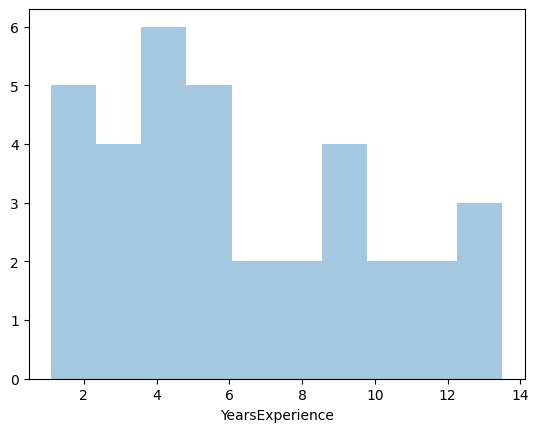

In [151]:
#visualizing
sns.distplot(salary_data['YearsExperience'],kde=False,bins=10)

<Axes: xlabel='count', ylabel='YearsExperience'>

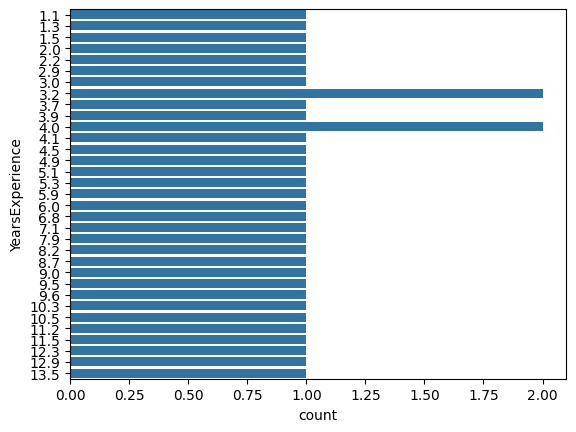

In [152]:
sns.countplot(y='YearsExperience', data=salary_data)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

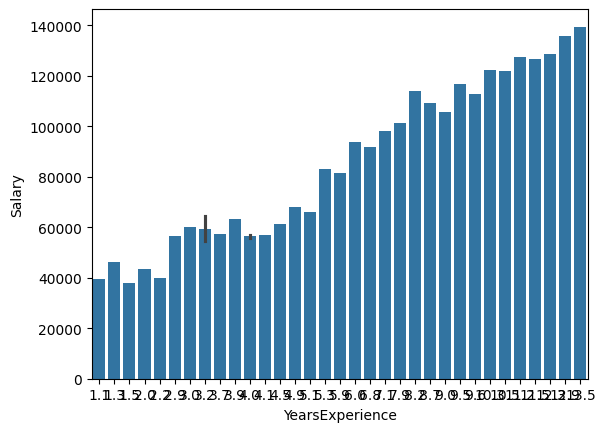

In [153]:
sns.barplot(x='YearsExperience',y='Salary',data=salary_data)

<Axes: >

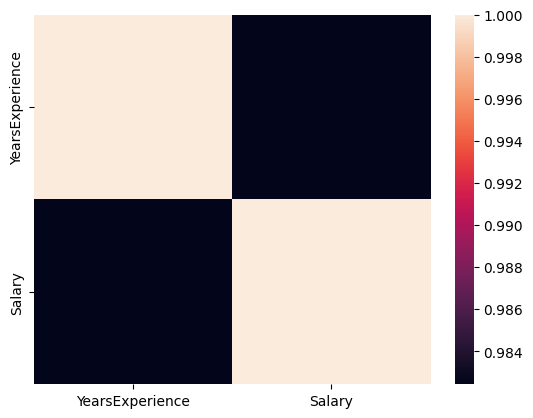

In [154]:
sns.heatmap(salary_data.corr())

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [156]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [157]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical features
X_train_encoded = encoder.fit_transform(X_train)

# Now, you can fit your Linear Regression model with the encoded features
lr.fit(X_train_encoded, y_train)


LinearRegression()

In [158]:
y_pred = lr.predict(X_train_encoded)
y_pred

array([[ 8.99390000e+04],
       [ 1.26763000e+05],
       [ 1.26900000e+03],
       [ 6.36450000e+04],
       [ 1.12770000e+04],
       [ 1.31802000e+05],
       [ 3.15870000e+04],
       [ 1.59026000e+05],
       [ 2.91040000e+04],
       [ 9.38637500e+04],
       [ 1.41099000e+05],
       [ 1.23282000e+05],
       [ 1.05070000e+05],
       [ 1.31546000e+03],
       [ 1.34440000e+05],
       [ 1.56672000e+05],
       [ 6.51890000e+04],
       [ 9.25070000e+04],
       [ 1.13168000e+05],
       [ 1.44520000e+05],
       [ 7.12220000e+04],
       [ 1.23073000e+05],
       [ 1.41159000e+05],
       [ 1.29013000e+05],
       [ 1.25783000e+05],
       [ 6.95180000e+04],
       [ 4.94070000e+04],
       [ 9.46571600e+04],
       [ 1.73030000e+04],
       [ 9.12620000e+04],
       [ 7.90090000e+04],
       [ 1.29319000e+05],
       [ 7.34900000e+04],
       [ 6.01700000e+04],
       [ 2.06290000e+04],
       [ 2.60300000e+03],
       [ 6.90600000e+03],
       [ 7.26980000e+04],
       [ 2.1

In [167]:
x_feature = X_train_encoded[:, 0].toarray().flatten()
#the columns are not in eaqual lenght so I used it

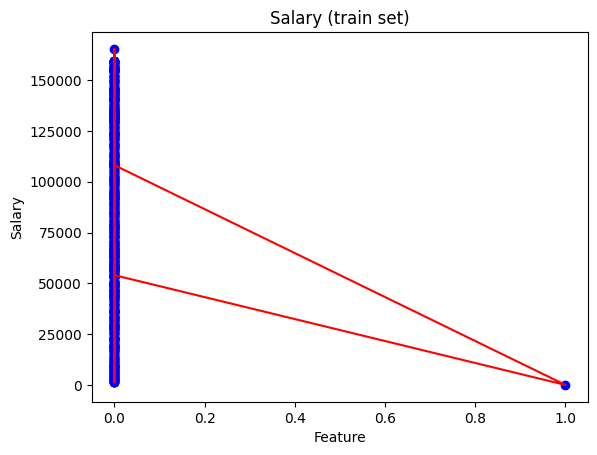

In [170]:
# Predict using the transformed feature matrix
predictions = lr.predict(X_train_encoded)

# Plotting
plt.scatter(x_feature, y_train, color='blue')
plt.plot(x_feature, predictions, color='red')
plt.title('Salary (train set)')
plt.xlabel('Feature')  # Replace 'Feature' with the appropriate feature name
plt.ylabel('Salary')
plt.show()


In [163]:
# plt.scatter(x_feature, y_train, color='blue')
# plt.plot(x_feature, lr.predict(x_feature), color='red')
# plt.title('Salary(train set)')
# plt.xlabel('year of exp')
# plt.ylabel('salary')
# plt.show()

In [175]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('R-squared:', r_squared)


ValueError: Found input variables with inconsistent numbers of samples: [334, 666]

In [176]:
print("Size of y_test:", len(y_test))
print("Size of y_pred:", len(y_pred))
#for me the lenght is not equal so it like this

Size of y_test: 334
Size of y_pred: 666
